## GROUP PROJECT: Euklid Case

Master's Degree in Data Science and Management 

Course: Machine Learning

Students: Gian Lorenzo Marchioni () - David Paquette () - Elena Tomasella (781321)


In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#import dataset
amazon_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Amazon_weekly.csv', sep = ',', header = 0)
cac_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Cac_weekly.csv', sep = ',', header = 0)
ibm_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/IBM_weekly.csv', sep = ',',header = 0)
microsoft_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Microsoft_weekly.csv', sep = ',', header = 0)
nasdaq_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Nasdaq_weekly.csv', sep = ',', header = 0)
sp500_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Sp500_weekly.csv', sep = ',', header=0)
dfs = [amazon_df, cac_df, ibm_df, microsoft_df, nasdaq_df, sp500_df]
dfs_names = ['Amazon', 'Cac', 'IBM', 'Microsoft', 'Nasdaq', 'sp500']

In [43]:
#conversion of Date values into datetime object
for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [41]:
amazon_df.tail()

,Date,Open,High,Low,Close,Volume
1394,2024-02-04,159.34,172.50,154.81,171.81,334522911
1395,2024-02-11,170.20,175.00,167.65,174.45,244063321
1396,2024-02-18,174.80,175.39,165.75,169.51,248174038
1397,2024-02-25,167.83,175.75,165.74,174.99,201663539
1398,2024-03-03,175.70,176.37,174.26,174.73,44368614


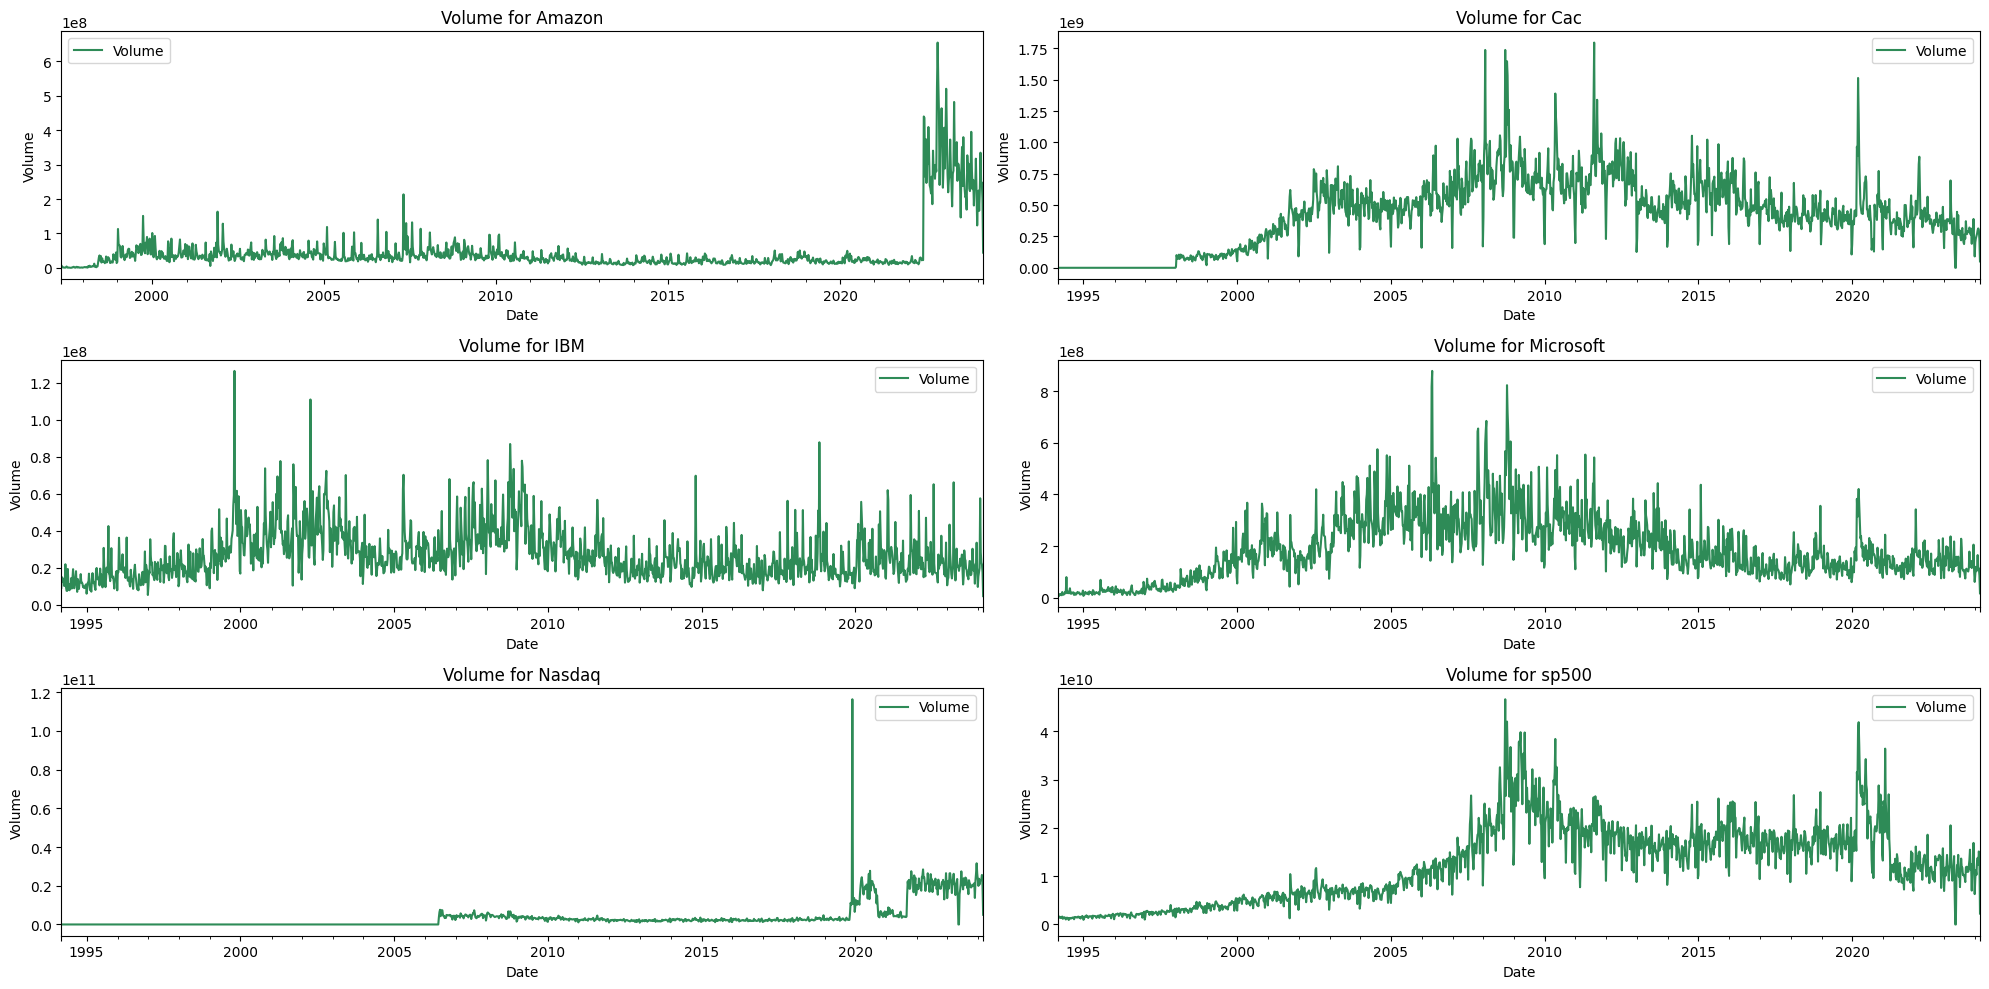

In [5]:
import matplotlib.dates as mdates
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')

plt.tight_layout()
plt.show()

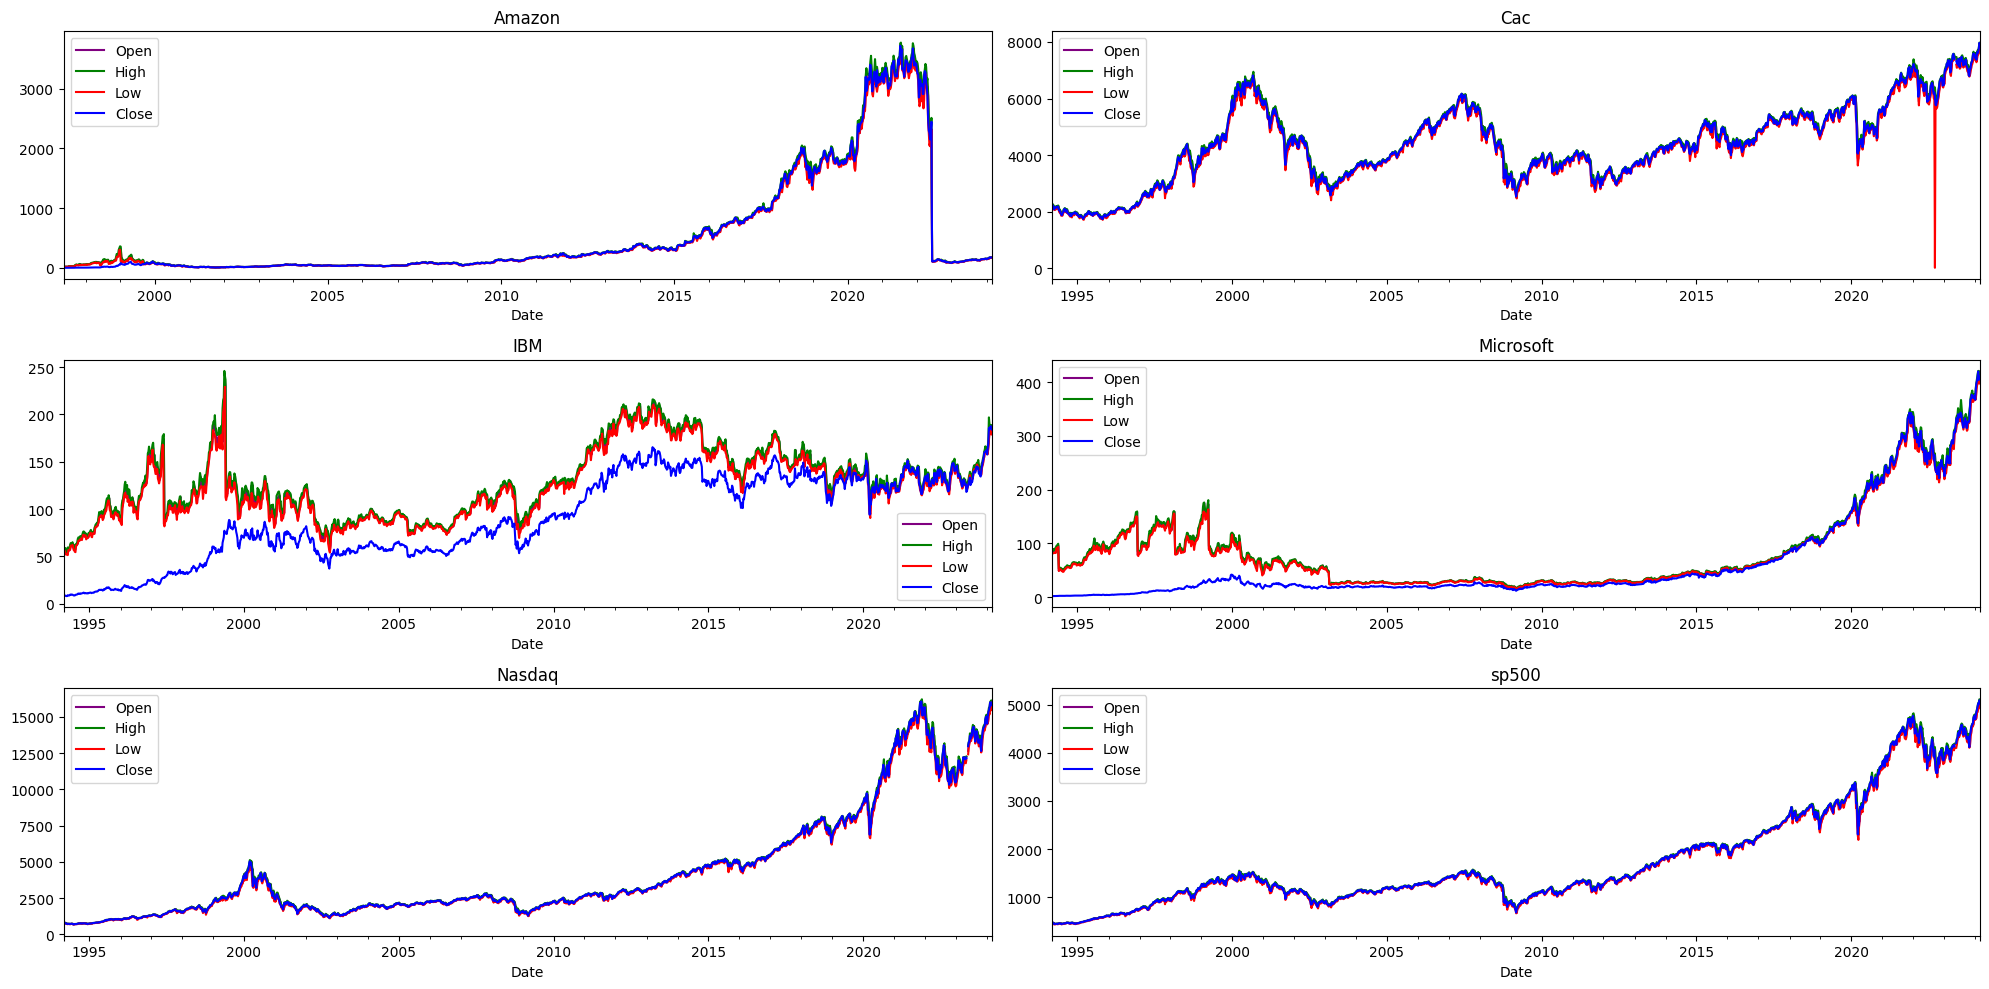

In [35]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

- Cac: on 2022-09-18 we had a problem with the 'Low'. Can we replace it from Yahoo finance?
- Microsoft: 

In [45]:
#replacing the value for the lowest (nonsense) value for Cac on 2022-09-18
cac_df.loc[cac_df['Low']==cac_df['Low'].min(), 'Low'] = 6052.42

Amazon splits:
- 1998-06-02 2:1
- 1999-01-05 3:1
- 1999-09-05 2:1
- 2022-06-06 20:1

Dobbiamo fare una base a 240. 

In [74]:
#fillna cac
cac_df[cac_df['Close'].isna()]

cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 7354.54
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 7523.56
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 7491.96
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 7443.38

cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] = 7197.40
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 7493.38
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 7319.18
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 7467.93

In [75]:
#fillna amazon
amazon_df[amazon_df['Close'].isna()]

,Date,Open,High,Low,Close,Volume,MA10,MA50,MACD,Signal_Line,RSI
1308,2022-06-12,NaN,NaN,NaN,NaN,439648156,NaN,NaN,-250.674023,-196.348852,37.245772
1309,2022-06-19,NaN,NaN,NaN,NaN,435602864,NaN,NaN,-250.674023,-207.213886,37.293357
1310,2022-06-26,NaN,NaN,NaN,NaN,265079681,NaN,NaN,-250.674023,-215.905913,24.225957
1311,2022-07-03,NaN,NaN,NaN,NaN,374172769,NaN,NaN,-250.674023,-222.859535,20.515276
1312,2022-07-10,NaN,NaN,NaN,NaN,246721340,NaN,NaN,-250.674023,-228.422433,20.867262
...,...,...,...,...,...,...,...,...,...,...,...
1394,2024-02-04,NaN,NaN,NaN,NaN,334522911,NaN,NaN,-250.674023,-250.674023,NaN
1395,2024-02-11,NaN,NaN,NaN,NaN,244063321,NaN,NaN,-250.674023,-250.674023,NaN
1396,2024-02-18,NaN,NaN,NaN,NaN,248174038,NaN,NaN,-250.674023,-250.674023,NaN
1397,2024-02-25,NaN,NaN,NaN,NaN,201663539,NaN,NaN,-250.674023,-250.674023,NaN


In [77]:
#fillna nasdaq
nasdaq_df[nasdaq_df['Close'].isna()]

nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 12174.06
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 12364.65
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 12284.74
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 12231.68

nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] = 12263.35
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 12731.73
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 12657.90
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 12301.17

In [79]:
#fillna sp500
sp500_df[sp500_df['Close'].isna()]

sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 4109.86
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 4212.91
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 4191.98
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 4126.65

sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] =4103.98
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 4212.87
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 4205.45
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 4190.78

In [81]:
#fillna ibm
ibm_df[ibm_df['Close'].isna()]

,Date,Open,High,Low,Close,Volume,MA10,MA50,MACD,Signal_Line,RSI


In [80]:
#fillna microsoft
microsoft_df[microsoft_df['Close'].isna()]

,Date,Open,High,Low,Close,Volume,MA10,MA50,MACD,Signal_Line,RSI


In [ ]:
amazon_df.loc[amazon_df['Date']>=pd.to_datetime('2022-06-06'),['Open', 'High', 'Low', 'Close']] = amazon_df.loc[amazon_df['Date']<pd.to_datetime('2022-06-06'),['Open', 'High', 'Low', 'Close']]*20

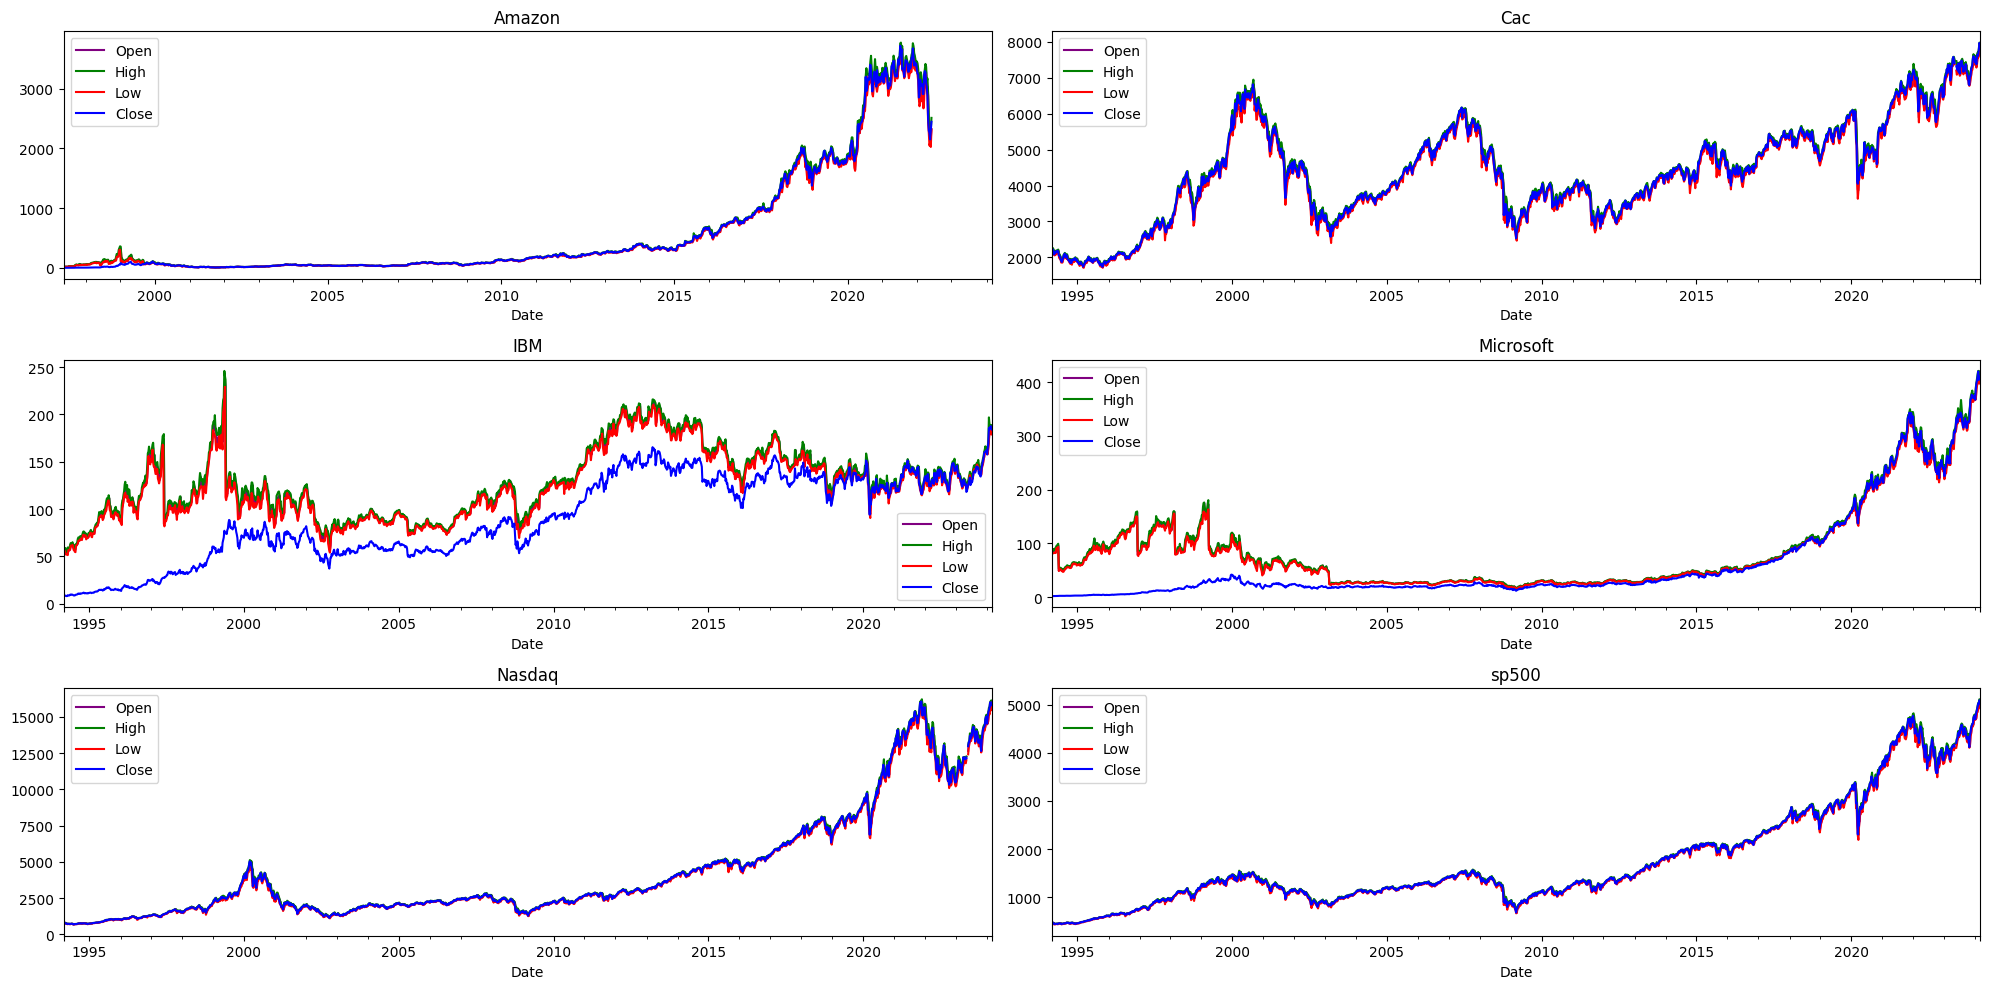

In [46]:
#check after our cleaning
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [7]:
#investigate missing values for the datasets
import missingno as msno
for name, df in zip(dfs_names, dfs):
    missing_rows = df[df.isna().any(axis=1)]
    if not missing_rows.empty:
        print(f"DataFrame: {name}")
        print(missing_rows)

for df in dfs:
    df.dropna(inplace=True) #do we have to check those dates on yahoo finance?

DataFrame: Cac
           Date  Open  High  Low  Close  Volume
1523 2023-05-14   NaN   NaN  NaN    NaN     0.0
1524 2023-05-21   NaN   NaN  NaN    NaN     0.0
DataFrame: Nasdaq
           Date  Open  High  Low  Close  Volume
1523 2023-05-14   NaN   NaN  NaN    NaN       0
1524 2023-05-21   NaN   NaN  NaN    NaN       0
DataFrame: sp500
           Date  Open  High  Low  Close  Volume
1523 2023-05-14   NaN   NaN  NaN    NaN       0
1524 2023-05-21   NaN   NaN  NaN    NaN       0


In [8]:
#summary statistics for the datasets
for name, df in zip(dfs_names, dfs):
    print(name)
    
    print(df.describe().T)

Amazon
         count                 mean                  min                  25%  \
Date      1399  2010-10-10 00:00:00  1997-05-18 00:00:00  2004-01-28 12:00:00   
Open    1399.0           554.660358                 5.91             47.28625   
High    1399.0           573.510226                 7.66               49.925   
Low     1399.0           538.014765                 5.51              44.5775   
Close   1399.0           550.467485               1.4896              41.1075   
Volume  1399.0      46996869.150822             420000.0           17453667.0   

                        50%                  75%                  max  \
Date    2010-10-10 00:00:00  2017-06-21 12:00:00  2024-03-03 00:00:00   
Open                 127.86               528.98               3744.0   
High               133.3125              543.845            3773.0781   
Low                  120.76               512.36            3570.4551   
Close                119.32               530.48            

Close<Low:
- Data recording errors: Errors might have occurred during the process of recording or entering the data, leading to inconsistencies.
- Data adjustments: Sometimes, historical data might be adjusted to account for corporate actions such as stock splits, dividends, or other factors. If not handled properly, these adjustments could lead to inconsistencies.
- Data processing issues: Errors might occur during data processing, such as merging or joining datasets, which could result in incorrect values being assigned.

In [9]:
#cases in which I have that Close<Low:
for df, name in zip(dfs, dfs_names):
    print(name, df[df['Close']<df['Low']])

Amazon           Date      Open      High      Low    Close    Volume
0   1997-05-18   18.0000   30.0000   18.000   1.7292   7238000
1   1997-05-25   21.1250   21.2500   15.750   1.5000   4836500
2   1997-06-01   18.1250   19.7500   17.500   1.5000   1611600
3   1997-06-08   18.1250   20.5000   16.500   1.6563   1527900
4   1997-06-15   19.8750   20.5000   18.375   1.5834    943700
..         ...       ...       ...      ...      ...       ...
115 1999-08-01  110.4375  115.5000   97.500  50.0313  55493000
116 1999-08-08   98.3750  102.1250   82.000  44.7813  63627000
117 1999-08-15   91.5000   97.4375   82.000  48.7188  42908500
118 1999-08-22   98.2500  117.5000   95.500  56.7188  48701800
119 1999-08-29  115.9375  135.5625  115.750  64.2500  48662200

[120 rows x 6 columns]
Cac Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
IBM            Date     Open     High      Low     Close    Volume
0    1994-03-06   53.125   53.875   52.125    8.0537   9055900
1    

SUM UP for Close<Low: 
- Amazon: we have 120 rows between '97 and '99
- Cac: no case
- IBM: 1370 cases from 1994 to 2024
- Microsoft: 1285 cases from 1994 to 2023
- Nasdaq: no case
- sp500: no case

In [10]:
#Check for duplicates
for df, name in zip(dfs, dfs_names):
    duplicates = df[df.duplicated()]
    print(name, duplicates)

Amazon Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Cac Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
IBM Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Microsoft Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Nasdaq Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
sp500 Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []


Outliers?

## PREPROCESSING

In [82]:
# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(data, short_window=12, long_window=26):
    short_ema = data['Close'].ewm(span=short_window, min_periods=1).mean()
    long_ema = data['Close'].ewm(span=long_window, min_periods=1).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=9, min_periods=1).mean()
    return macd, signal_line

In [83]:
#feature engeneering 
for df in dfs:
    # Calculate moving averages (e.g., 10-day and 50-day)
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA50'] = df['Close'].rolling(window=50).mean()
    df['MACD'], df['Signal_Line'] = calculate_macd(df)
    df['RSI'] = calculate_rsi(df)

## INDEX

In [87]:
nasdaq_df.sample(5)

,Date,Open,High,Low,Close,Volume,MA10,MA50,MACD,Signal_Line,RSI
1211,2017-05-21,6128.110,6170.158,5996.815,6083.703,2506134848,5958.8255,5446.42816,184.971623,176.585318,71.838072
69,1995-07-02,938.330,939.270,912.910,933.450,0,882.1210,790.17800,38.092444,29.504632,87.544973
1336,2019-10-13,7956.407,8115.797,7823.732,8057.039,2348577482,7994.6370,7644.03322,83.271471,104.322176,46.957749
147,1996-12-29,1290.680,1297.150,1276.930,1291.380,0,1268.3190,1173.49800,37.399255,34.010312,75.590776
50,1995-02-19,789.700,796.240,786.660,786.970,0,760.5490,747.57620,7.673531,3.927640,58.935635


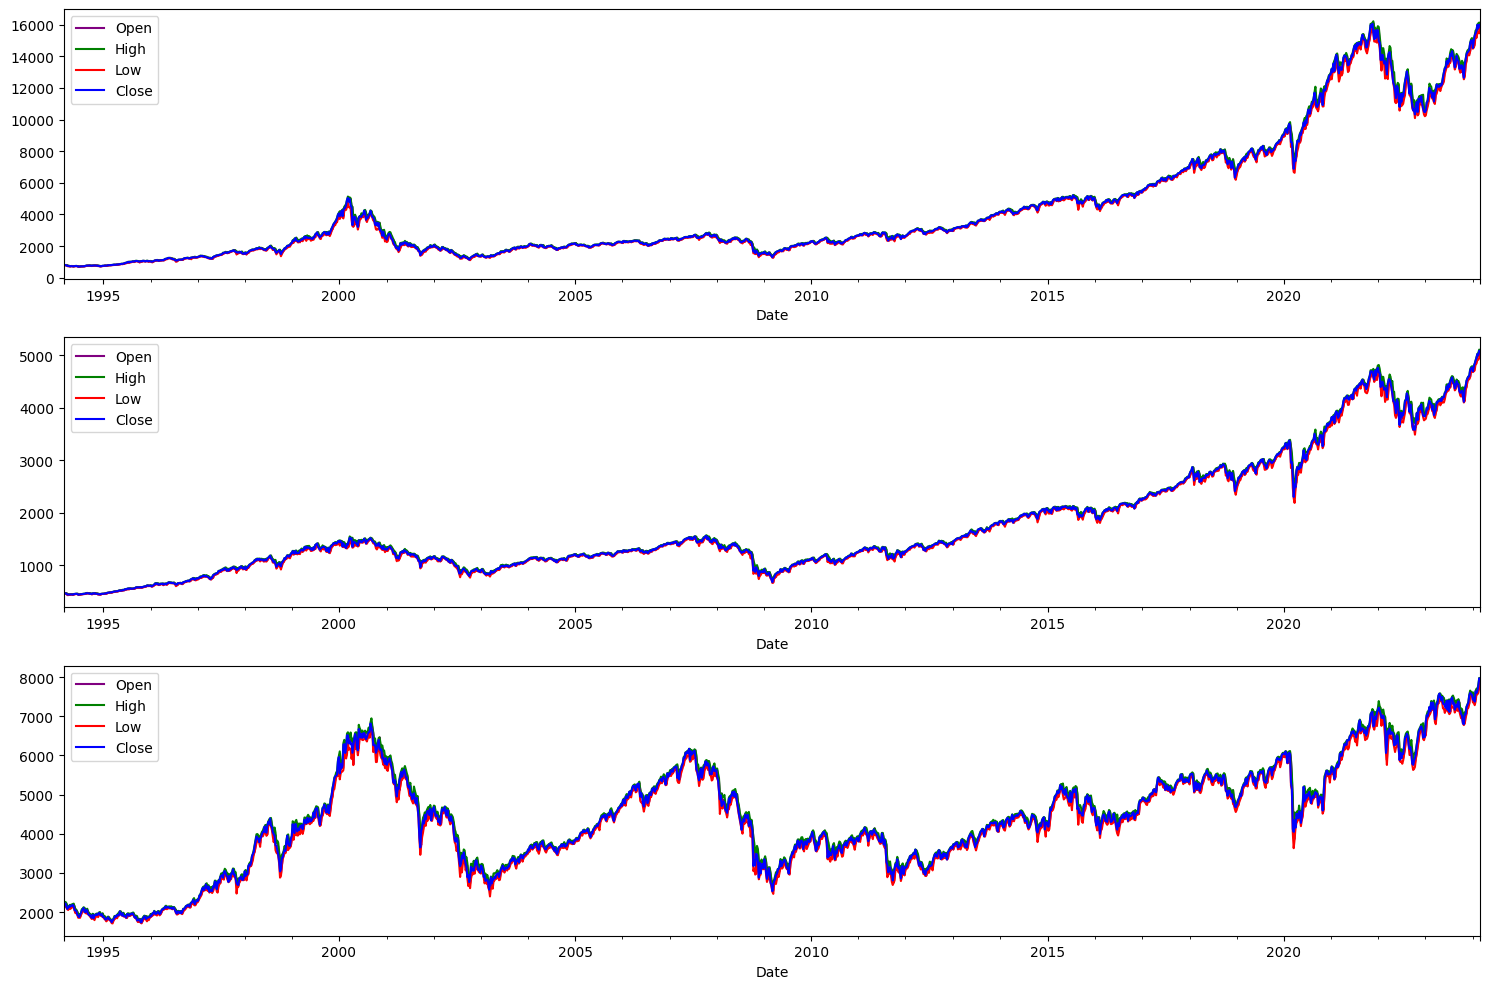

In [86]:
dfs_1 = [nasdaq_df, sp500_df, cac_df]
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
for i in range(3):
        dfs_1[i].plot(x='Date', y='Open', ax=axs[i], color = 'purple')
        dfs_1[i].plot(x='Date', y='High', ax=axs[i], color = 'green')
        dfs_1[i].plot(x='Date', y='Low', ax=axs[i], color = 'red')
        dfs_1[i].plot(x='Date', y='Close', ax=axs[i], color = 'blue')
plt.tight_layout()
plt.show()

In [88]:
from sklearn.preprocessing import StandardScaler
for df in dfs_1:
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Creare un oggetto StandardScaler
    scaler = StandardScaler()
    
    # Applicare lo StandardScaler alle colonne numeriche
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [90]:
#split train and test
from sklearn.model_selection import train_test_split
nasdaq_train, nasdaq_test = train_test_split(nasdaq_df, test_size=0.2, random_state=42)
sp500_train, sp500_test = train_test_split(sp500_df, test_size=0.2, random_state=42)
cac_train, cac_test = train_test_split(cac_df, test_size=0.2, random_state=42)

#SYSTEMATIC TRAINING MODEL
- Considering VIX
- if MA10>MA50 --> Output 1
- if MA50>MA

In [ ]:
#SYSTEMATIC TRAINING MODEL
